In [3]:
# 폰트 추가로 그래프를 그렸을때 잘 나올 수 있도록 설정해주기

%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

In [14]:
!pip install category_encoders
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.4 MB/s eta 0:00:00


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

0. 데이터불러오기

In [16]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("sample_submission.csv")

### EDA

<Axes: xlabel='대출기간', ylabel='count'>

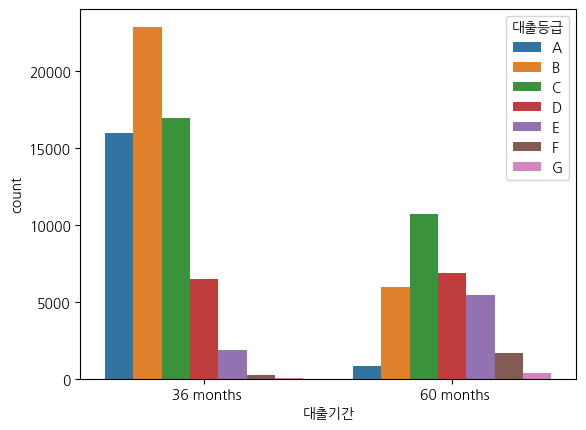

In [17]:
sns.countplot(data=train, x="대출기간", hue="대출등급", hue_order=["A","B","C","D","E","F","G"])

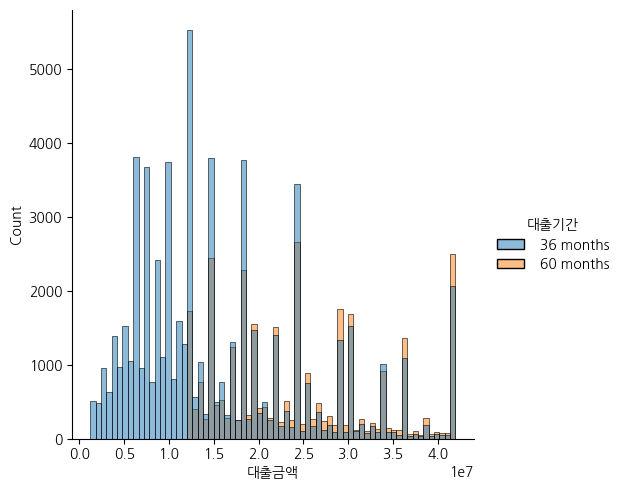

In [18]:
sns.displot(data=train, x="대출금액", hue="대출기간")

대출기간에 따른 대출금액의 차이 확인

<Axes: xlabel='대출등급', ylabel='총상환원금'>

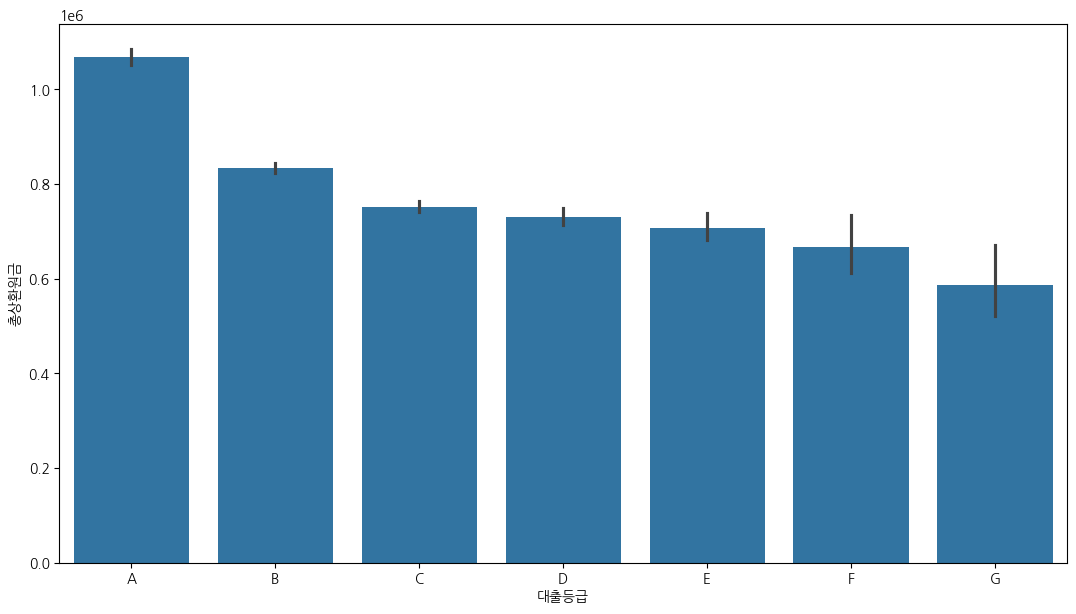

In [19]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="총상환원금", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='총상환이자'>

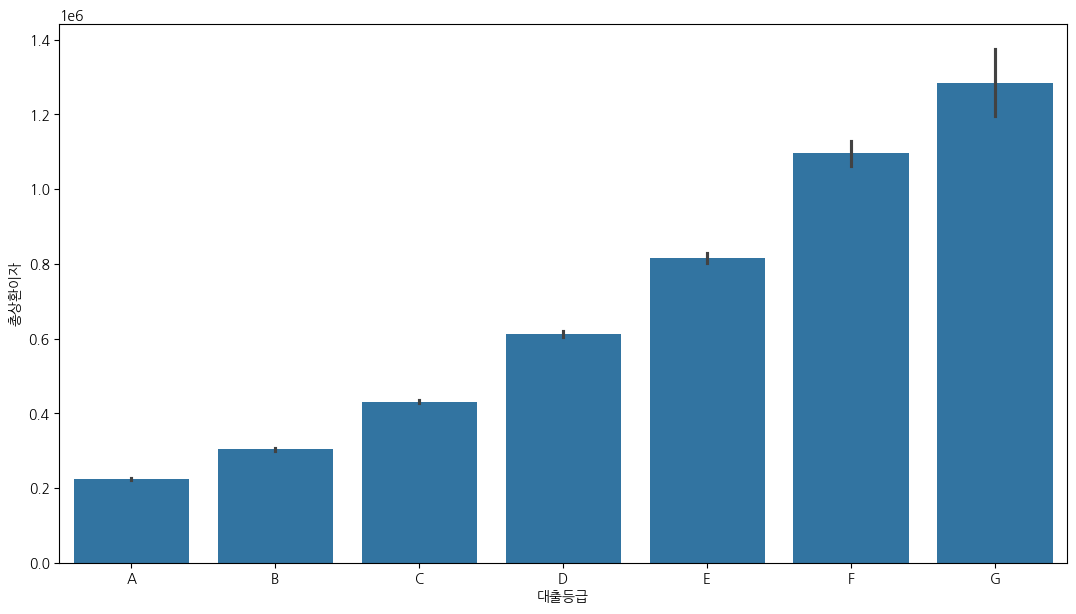

In [20]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="총상환이자", order=["A","B","C","D","E","F","G"])

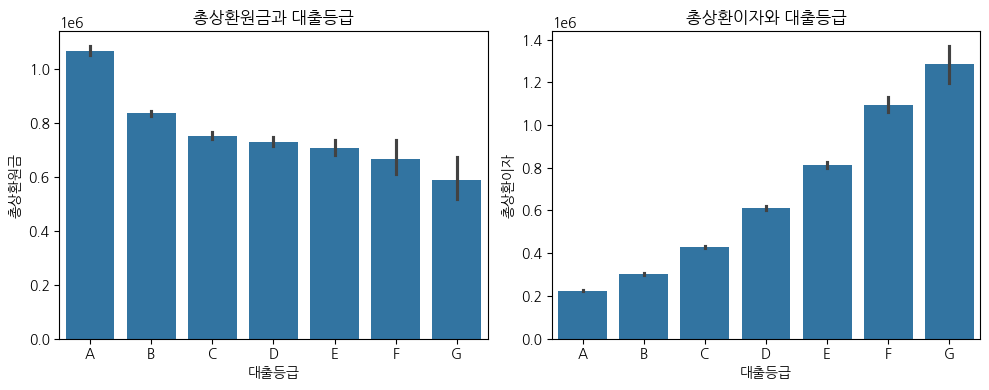

In [21]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title("총상환원금과 대출등급")
sns.barplot(data=train, x="대출등급", y="총상환원금", order=["A","B","C","D","E","F","G"])

plt.subplot(1,2,2)
plt.title("총상환이자와 대출등급")
sns.barplot(data=train, x="대출등급", y="총상환이자", order=["A","B","C","D","E","F","G"])

plt.tight_layout()

대출 등급별로 총상환원금과, 총상환이자의 분포가 크게 차이남을 확인

In [22]:
test_1 = train[(train["총상환이자"] > 0)]
test_2= train[(train["총상환이자"] == 0)]

<Axes: xlabel='대출등급', ylabel='count'>

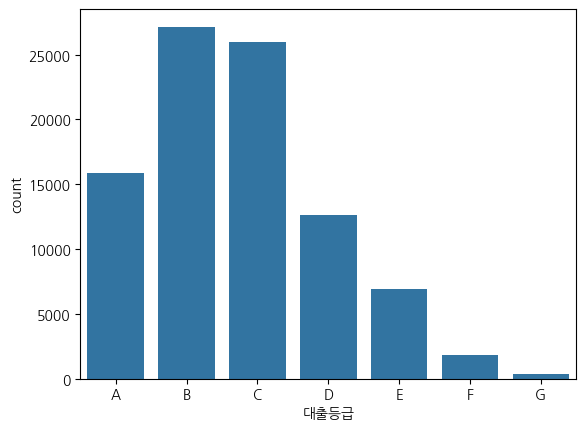

In [23]:
sns.countplot(data=test_1, x="대출등급", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='count'>

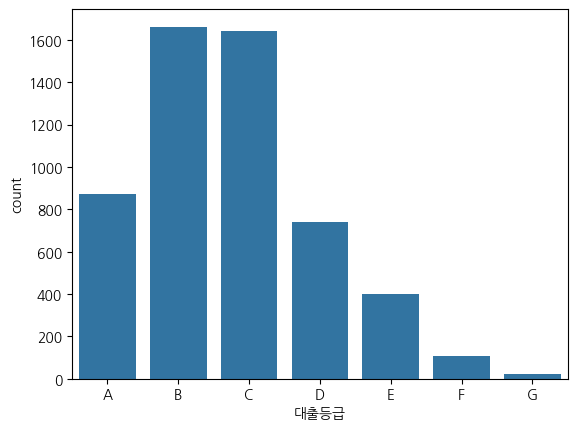

In [24]:
sns.countplot(data=test_2, x="대출등급", order=["A","B","C","D","E","F","G"])

0과 0보다 큰값으로 나눠봤는데, 별로 큰 차이를 보이지않음

In [25]:
test_3 = train[(train["총상환이자"] == train["총상환원금"])]
test_4 = train[(train["총상환이자"] > train["총상환원금"])]
test_5 = train[(train["총상환이자"] < train["총상환원금"])]

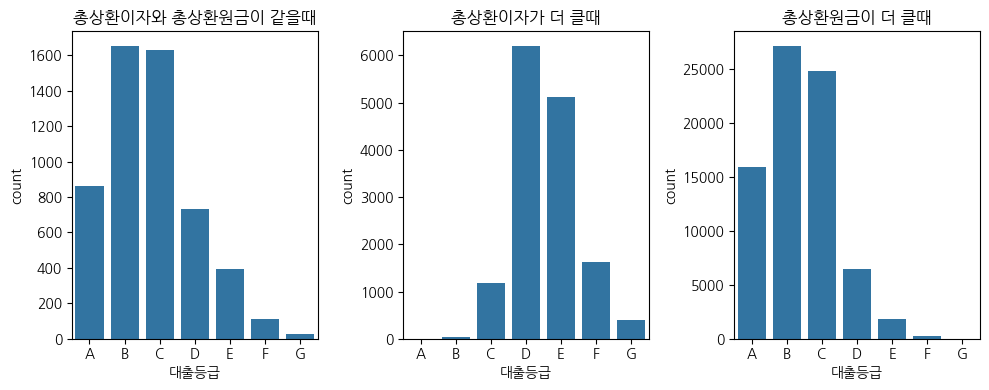

In [26]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.title("총상환이자와 총상환원금이 같을때")
sns.countplot(data=test_3, x="대출등급", order=["A","B","C","D","E","F","G"])

plt.subplot(1,3,2)
plt.title("총상환이자가 더 클때")
sns.countplot(data=test_4, x="대출등급", order=["A","B","C","D","E","F","G"])

plt.subplot(1,3,3)
plt.title("총상환원금이 더 클때")
sns.countplot(data=test_5, x="대출등급", order=["A","B","C","D","E","F","G"])

plt.tight_layout()

총상환이자가 더 클때는 확실히 다른 분포를 보임을 확인했다.

<Axes: xlabel='대출등급', ylabel='총연체금액'>

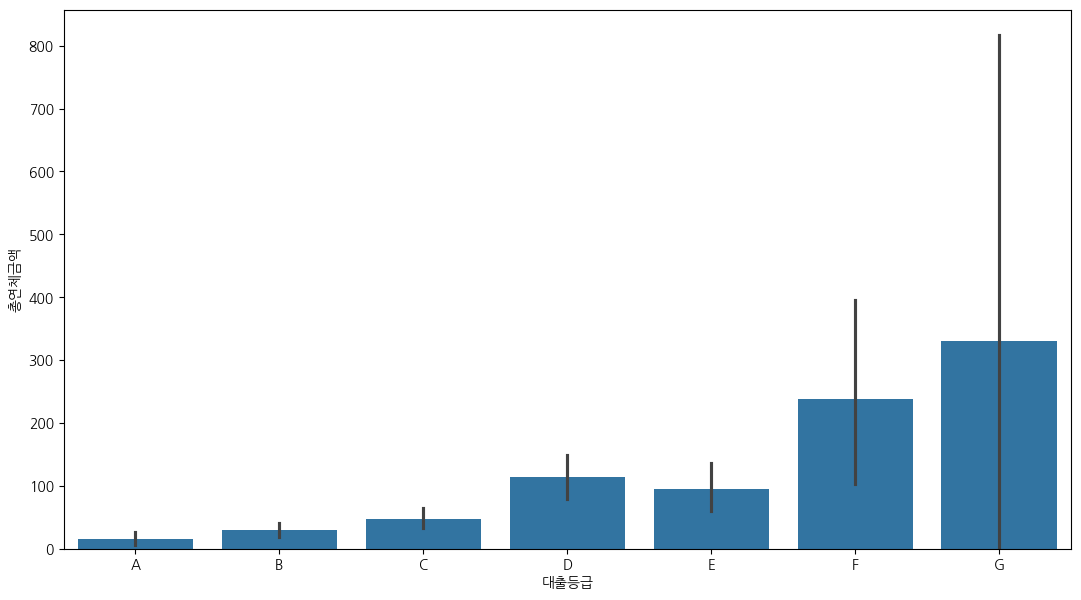

In [27]:
plt.figure(figsize=(13,7))
sns.barplot(data=train, x="대출등급", y="총연체금액", order=["A","B","C","D","E","F","G"])

In [28]:
test_a = train[(train["총연체금액"] > 0)]
test_b = train[(train["총연체금액"] == 0)]

<Axes: xlabel='대출등급', ylabel='count'>

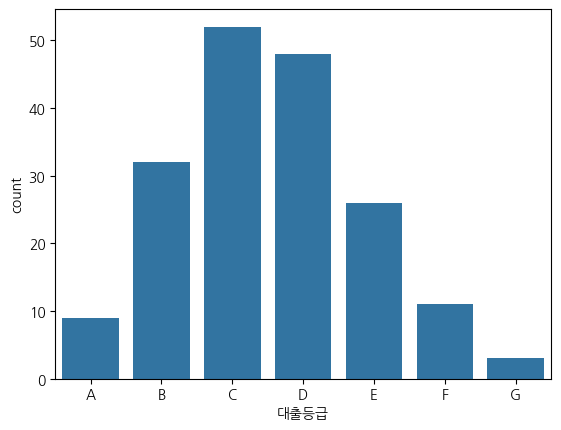

In [29]:
sns.countplot(data=test_a, x="대출등급", order=["A","B","C","D","E","F","G"])

<Axes: xlabel='대출등급', ylabel='count'>

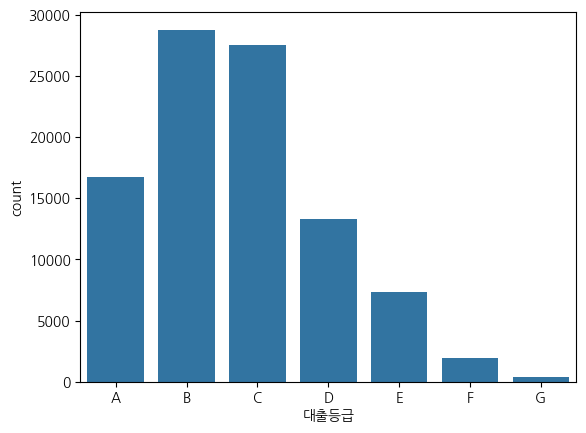

In [30]:
sns.countplot(data=test_b, x="대출등급", order=["A","B","C","D","E","F","G"])

둘의 분포가 크게 다르지는 않지만, 조금의 차이는 확인됬다.

### 데이터전처리

In [31]:
train.isnull().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [32]:
features = train.columns[1:-1]
object_columns = []
number_columns = []

for feature in features:
    if train[feature].dtype == "object":
        object_columns.append(feature)
    else:
        number_columns.append(feature)

print(f'object_columns : {object_columns}')
print(f'number_columns : {number_columns}')


object_columns : ['대출기간', '근로기간', '주택소유상태', '대출목적']
number_columns : ['대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수']


object_columns 확인

In [33]:
display(train["대출기간"].value_counts())
display(train["근로기간"].value_counts())
display(train["주택소유상태"].value_counts())
display(train["대출목적"].value_counts())
display(train["대출등급"].value_counts())

 36 months    64479
 60 months    31815
Name: 대출기간, dtype: int64

10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: 근로기간, dtype: int64

MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: 주택소유상태, dtype: int64

부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: 대출목적, dtype: int64

B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: 대출등급, dtype: int64

- 근로기간 전처리 팔요확인
- 대출등급, 대출목적이 항목이 많고, 항목별로 차이가 큰 것을 확인

In [34]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


값이 특히 트거나, 작은값들 발견 -> 이상치 처리 필요성
- 부채_대비_소득_비율 max : 9999
- 연간소득 min : 0

In [35]:
from scipy import stats
z_scores = stats.zscore(train[number_columns])

threshold = 5

outliers_z = train[(z_scores > threshold).any(axis=1)]

print(f'z-score 기반 이상치의 전체 데이터에 대한 비율: {len(outliers_z)/len(train) * 100} %')
print(f'개수 : {len(outliers_z)}')

z-score 기반 이상치의 전체 데이터에 대한 비율: 2.283631378902112 %
개수 : 2199


In [36]:
train_del_outlier = train.drop(outliers_z.index)

- z-score기반 이상치 처리
- 너무 많은 값이 삭제되지 않도록 threshold를 5로 조정했다.

In [37]:
train_del_outlier.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.409500e+04,9.409500e+04,94095.000000,94095.000000,94095.000000,9.409500e+04,9.409500e+04,94095.000000,94095.0
mean,1.823065e+07,9.155877e+07,19.291554,25.136702,0.284553,7.865808e+05,4.200831e+05,0.140284,0.0
std,1.026725e+07,5.453069e+07,8.724822,11.880990,0.672844,6.986236e+05,4.181415e+05,26.242205,0.0
min,1.200000e+06,6.000000e+06,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.020000e+07,5.640000e+07,12.680000,16.000000,0.000000,3.051720e+05,1.338000e+05,0.000000,0.0
50%,1.680000e+07,7.800000e+07,18.770000,23.000000,0.000000,5.947200e+05,2.853600e+05,0.000000,0.0
75%,2.400000e+07,1.116000e+08,25.570000,32.000000,0.000000,1.042728e+06,5.655480e+05,0.000000,0.0
max,4.200000e+07,5.880000e+08,125.250000,85.000000,4.000000,5.951148e+06,2.629008e+06,6000.000000,0.0


위에서 확인했던 이상치가 없어졌다.

In [38]:
over_index = train_del_outlier[train_del_outlier["부채_대비_소득_비율"] > 100].index

for index in over_index:
    train_del_outlier.loc[index, "부채_대비_소득_비율"] = 101

In [39]:
over_index_test = test[test["부채_대비_소득_비율"] > 100].index

for index in over_index_test:
    test.loc[index, "부채_대비_소득_비율"] = 101

부채 대배 소득 비율이 100이상일때는 101로 통일

In [40]:
index_to_test = test[test["연간소득"] == 0].index

for index in index_to_test:
    test.loc[index, "연간소득"] = test.loc[index, "대출금액"] / (test.loc[index, "부채_대비_소득_비율"] / 100)

In [41]:
# 의미가 겹치는 범주 같게 만들어주기
train_del_outlier["근로기간"] = train_del_outlier["근로기간"].str.replace("years", "").str.replace("year", "")
train_del_outlier["근로기간"] = train_del_outlier["근로기간"].str.replace(" ", "")

test["근로기간"] = test["근로기간"].str.replace("years", "").str.replace("year", "")
test["근로기간"] = test["근로기간"].str.replace(" ", "")

In [42]:
# LabelEncoder 인스턴스 생성
label_encoder = LabelEncoder()

# 근로기간을 숫자 값으로 변환
train_del_outlier["근로기간"] = label_encoder.fit_transform(train_del_outlier["근로기간"])
test["근로기간"] = label_encoder.transform(test["근로기간"])

# 대출기간을 숫자 값으로 변환
train_del_outlier["대출기간"] = label_encoder.fit_transform(train_del_outlier["대출기간"])
test["대출기간"] = label_encoder.transform(test["대출기간"])

# 주택소유상태를 숫자 값으로 변환
train_del_outlier["주택소유상태"] = label_encoder.fit_transform(train_del_outlier["주택소유상태"])
test["주택소유상태"] = label_encoder.transform(test["주택소유상태"])

근로기간, 대출기간, 주택소유상태 라벨 인코딩

### 특성 중요도 확인(RandomForest)

In [ ]:
train_del_outlier.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,0,6,3,72000000,18.90,15.0,부채 통합,0.0,0.0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,1,1,1,130800000,22.33,21.0,주택 개선,0.0,373572.0,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,0,5,1,96000000,8.60,14.0,부채 통합,0.0,928644.0,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,0,8,1,132000000,15.09,15.0,부채 통합,0.0,325824.0,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,1,11,3,71736000,25.39,19.0,주요 구매,0.0,228540.0,148956.0,0.0,0.0,B


In [ ]:
# 바이너리 인코딩
# 대출목적의 경우 항목이 너무 다양하고, 라벨 인코딩이 적합하지 않다고 판단되서 바이너리 인코딩을 진행
train_ex = train_del_outlier.copy()
test_ex = test.copy()

# Creating a BinaryEncoder instances
encoder = ce.BinaryEncoder(cols=['대출목적'])

# Fitting and transforming the 'occupation' column
train_encoded = encoder.fit_transform(train_ex['대출목적'])
test_encoded = encoder.transform(test_ex['대출목적'])

encoded_train_columns = train_encoded.columns
encoded_test_columns = test_encoded.columns

# Creating a DataFrame from the binary encoded data
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_train_columns)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_test_columns)
train_del_outlier = pd.concat([train_del_outlier, train_encoded_df], axis=1).drop(['대출목적'], axis=1)
test = pd.concat([test, test_encoded_df], axis=1).drop(['대출목적'], axis=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

train_x = train_del_outlier.drop(["대출등급", "ID"], axis=1)
train_y = train_del_outlier["대출등급"]

test_x = test.drop("ID", axis=1)

# RandomForestClassifier 모델 생성
model = RandomForestClassifier(random_state=42)

# 모델 학습
model.fit(train_x, train_y)

# 예측
y_pred = model.predict(test_x)

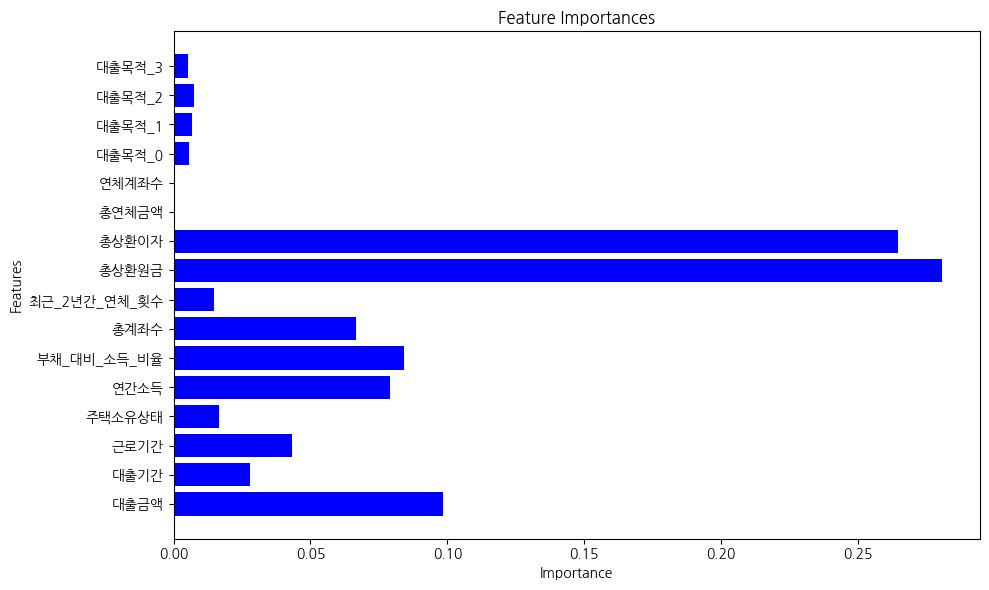

In [ ]:
# 피처 중요도 추출
importances = model.feature_importances_
feature_names = train_x.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(feature_names, importances, color="b")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

### 파생변수 생성과 변수선택

In [44]:
# train 특성엔지니어링
train_del_outlier["월_대출금액"] = round(train_del_outlier["대출금액"] / train_del_outlier["대출기간"],1)
train_del_outlier["월_대출대비_소득비율"] = round((train_del_outlier["연간소득"]/12)/train_del_outlier["월_대출금액"],1)

train_del_outlier["대출금액_총상환이자_비율"] = np.where(train_del_outlier["총상환이자"] == 0, np.nan, train_del_outlier["대출금액"] / train_del_outlier["총상환이자"])
train_del_outlier["대출금액_총상환이자_비율"].fillna(0, inplace=True)

train_del_outlier["대출금액_총상환원금_비율"] = np.where(train_del_outlier["총상환원금"] == 0, np.nan, train_del_outlier["대출금액"] / train_del_outlier["총상환원금"])
train_del_outlier["대출금액_총상환원금_비율"].fillna(0, inplace=True)

train_del_outlier["상환이자_상환원금"] = train_del_outlier.apply(lambda x : 0 if x["총상환이자"] == x["총상환원금"] else (1 if x["총상환이자"] > x["총상환원금"] else 2), axis=1)

train_del_outlier["총연체금액"] = train_del_outlier["총연체금액"].apply(lambda x: 1 if x > 0 else 0)

train_del_outlier["총상환액"] = train_del_outlier["총상환원금"] + train_del_outlier["총상환이자"]

train_del_outlier["소득대비_총상환액_비율"] = train_del_outlier["총상환액"] / train_del_outlier["연간소득"]
train_del_outlier["대출대비_총상환액_비율"] = train_del_outlier["총상환액"] / train_del_outlier["대출금액"]

train_del_outlier["대출대비_총상환원금_비율"] = train_del_outlier["총상환원금"] / train_del_outlier["대출금액"]
train_del_outlier["대출대비_총상환이자_비율"] = train_del_outlier["총상환이자"] / train_del_outlier["대출금액"]

train_del_outlier["소득대비_총상환원금_비율"] = train_del_outlier["총상환원금"] / train_del_outlier["연간소득"]
train_del_outlier["소득대비_총상환이자_비율"] = train_del_outlier["총상환이자"] / train_del_outlier["연간소득"]

# -------------------------------------------------------------------------------------------------------------------------------------------------
# test 특성엔지니어링
test["월_대출금액"] = round(test["대출금액"] / test["대출기간"],1)
test["월_대출대비_소득비율"] = round((test["연간소득"]/12)/test["월_대출금액"],1)

test["대출금액_총상환이자_비율"] = np.where(test["총상환이자"] == 0, np.nan, test["대출금액"] / test["총상환이자"])
test["대출금액_총상환이자_비율"].fillna(0, inplace=True)

test["대출금액_총상환원금_비율"] = np.where(test["총상환원금"] == 0, np.nan, test["대출금액"] / test["총상환원금"])
test["대출금액_총상환원금_비율"].fillna(0, inplace=True)

test["상환이자_상환원금"] = test.apply(lambda x : 0 if x["총상환이자"] == x["총상환원금"] else (1 if x["총상환이자"] > x["총상환원금"] else 2), axis=1)

test["총연체금액"] = test["총연체금액"].apply(lambda x: 1 if x > 0 else 0)

test["총상환액"] = test["총상환원금"] + test["총상환이자"]

test["소득대비_총상환액_비율"] = test["총상환액"] / test["연간소득"]
test["대출대비_총상환액_비율"] = test["총상환액"] / test["대출금액"]

test["대출대비_총상환원금_비율"] = test["총상환원금"] / test["대출금액"]
test["대출대비_총상환이자_비율"] = test["총상환이자"] / test["대출금액"]

test["소득대비_총상환원금_비율"] = test["총상환원금"] / test["연간소득"]
test["소득대비_총상환이자_비율"] = test["총상환이자"] / test["연간소득"]

In [45]:
# 필요없는 속성 삭제
train_del_outlier.drop(["월_대출금액"], axis=1, inplace=True)
test.drop(["월_대출금액"], axis=1, inplace=True)

In [46]:
# 바이너리 인코딩
# 대출목적의 경우 항목이 너무 다양하고, 라벨 인코딩이 적합하지 않다고 판단되서 바이너리 인코딩을 진행
train_ex = train_del_outlier.copy()
test_ex = test.copy()

# Creating a BinaryEncoder instances
encoder = ce.BinaryEncoder(cols=['대출목적'])

# Fitting and transforming the 'occupation' column
train_encoded = encoder.fit_transform(train_ex['대출목적'])
test_encoded = encoder.transform(test_ex['대출목적'])

encoded_train_columns = train_encoded.columns
encoded_test_columns = test_encoded.columns

# Creating a DataFrame from the binary encoded data
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_train_columns)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_test_columns)
train_del_outlier = pd.concat([train_del_outlier, train_encoded_df], axis=1).drop(['대출목적'], axis=1)
test = pd.concat([test, test_encoded_df], axis=1).drop(['대출목적'], axis=1)

In [47]:
# # 너무 큰 값이나 무한대 확인
# max_values = train_del_outlier.apply(pd.to_numeric, errors='coerce').max()
# min_values = train_del_outlier.apply(pd.to_numeric, errors='coerce').min()

# # 너무 큰 값이나 무한대가 있는지 여부 확인
# large_values_mask = (max_values == np.inf) | (min_values == -np.inf) | (max_values > 1e15) | (min_values < -1e15)
# large_values_columns = large_values_mask[large_values_mask].index.tolist()
# if large_values_columns:
#     print("너무 큰 값이나 무한대가 포함된 열:", large_values_columns)

# # 결측치 확인
# missing_values = train_del_outlier.isnull().sum()
# missing_values_columns = missing_values[missing_values > 0].index.tolist()
# if missing_values_columns:
#     print("결측치가 있는 열:", missing_values_columns)

In [48]:
train_x = train_del_outlier.drop(["대출등급", "ID"], axis=1)
train_y = train_del_outlier["대출등급"]

test_x = test.drop("ID", axis=1)

# RandomForestClassifier 모델 생성
model = RandomForestClassifier(random_state=42)

step = 1
min_features_to_select = 3
selector = RFECV(model, step=step, cv=10, min_features_to_select=min_features_to_select)

# 모델 학습
selector.fit(train_x, train_y)

RFECV(cv=10, estimator=RandomForestClassifier(random_state=42),
      min_features_to_select=3)

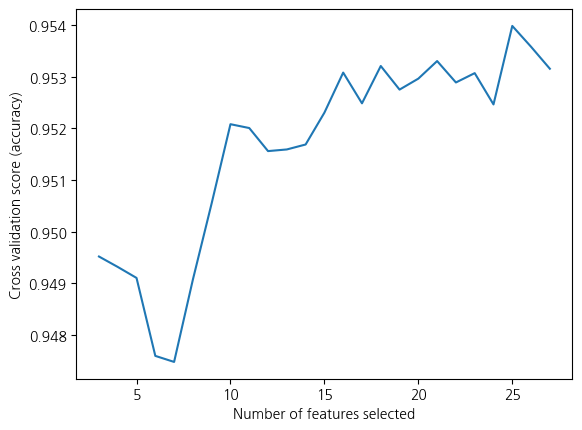

In [49]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector.cv_results_['mean_test_score']) * step + min_features_to_select, step),
    selector.cv_results_['mean_test_score'],
)
plt.show()

In [51]:
selector.support_.sum()

25

In [50]:
# RFECV로 선택된 feature
train_x.columns[selector.support_]

Index(['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '월_대출대비_소득비율', '대출금액_총상환이자_비율',
       '대출금액_총상환원금_비율', '상환이자_상환원금', '총상환액', '소득대비_총상환액_비율', '대출대비_총상환액_비율',
       '대출대비_총상환원금_비율', '대출대비_총상환이자_비율', '소득대비_총상환원금_비율', '소득대비_총상환이자_비율',
       '대출목적_0', '대출목적_1', '대출목적_2', '대출목적_3'],
      dtype='object')

### 모델링 1

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, f1_score

new_train_x = train_del_outlier.drop(['ID', '대출등급', '총연체금액', '연체계좌수'], axis=1)
new_train_y = train_del_outlier["대출등급"]

display("#######  교차 검증 성능  #########")

model = RandomForestClassifier(random_state = 42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_result = cross_validate(model, new_train_x, new_train_y, cv=kf, scoring=make_scorer(f1_score, average='macro'))

# 각 폴드의 Macro F1 score를 출력합니다
for i, score in enumerate(cv_result["test_score"]):
    print(f"Fold {i+1} - Macro F1 Score: {score}")

# 전체 교차 검증의 Macro F1 score를 출력합니다
print("Average Macro F1 Score:", cv_result["test_score"].mean())

'#######  교차 검증 성능  #########'

Fold 1 - Macro F1 Score: 0.9494308431681862
Fold 2 - Macro F1 Score: 0.9379038596824459
Fold 3 - Macro F1 Score: 0.9421581707267236
Fold 4 - Macro F1 Score: 0.9481490468234612
Fold 5 - Macro F1 Score: 0.9385669491488989
Average Macro F1 Score: 0.9432417739099431


In [ ]:
test_x.columns

Index(['대출금액', '대출기간', '근로기간', '주택소유상태', '연간소득', '부채_대비_소득_비율', '총계좌수',
       '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수', '월_대출대비_소득비율',
       '대출금액_총상환이자_비율', '대출금액_총상환원금_비율', '상환이자_상환원금', '총상환액', '소득대비_총상환액_비율',
       '대출대비_총상환액_비율', '대출대비_총상환원금_비율', '대출대비_총상환이자_비율', '소득대비_총상환원금_비율',
       '소득대비_총상환이자_비율', '대출목적_0', '대출목적_1', '대출목적_2', '대출목적_3'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

new_train_x = train_del_outlier.drop(['ID', '대출등급', '총연체금액', '연체계좌수'], axis=1)
new_train_y = train_del_outlier["대출등급"]

new_test_x = test.drop(['ID','총연체금액', '연체계좌수'], axis=1)

# RandomForestClassifier 모델 생성
model = RandomForestClassifier(random_state=42)

# 모델 학습
model.fit(new_train_x, new_train_y)

# 예측
y_pred = model.predict(new_test_x)

In [ ]:
submit.loc[:,"대출등급"] = y_pred
submit

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,C


In [ ]:
submit.to_csv("modeling1.csv", index=False)

제출해보니 Private 0.940 public 0.944로 향상된 것을 확인했다.

### 모델링 2,3,4 (사용 X)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, f1_score

new_train_x = train_del_outlier.drop(['ID', '대출등급', '총연체금액', '연체계좌수'], axis=1)
new_train_y = train_del_outlier["대출등급"]

display("#######  교차 검증 성능  #########")

model2 = LGBMClassifier(random_state = 42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_result = cross_validate(model2, new_train_x, new_train_y, cv=kf, scoring=make_scorer(f1_score, average='macro'))

# 각 폴드의 Macro F1 score를 출력합니다
for i, score in enumerate(cv_result["test_score"]):
    print(f"Fold {i+1} - Macro F1 Score: {score}")

# 전체 교차 검증의 Macro F1 score를 출력합니다
print("Average Macro F1 Score:", cv_result["test_score"].mean())

'#######  교차 검증 성능  #########'

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019583 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3708
[LightGBM] [Info] Number of data points in the train set: 75276, number of used features: 25
[LightGBM] [Info] Start training from score -1.744055
[LightGBM] [Info] Start training from score -1.200957
[LightGBM] [Info] Start training from score -1.248422
[LightGBM] [Info] Start training from score -1.977722
[LightGBM] [Info] Start training from score -2.583682
[LightGBM] [Info] Start training from score -3.936579
[LightGBM] [Info] Start training from score -5.538557
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3707
[LightGBM

LGBMClassifier 모델은 0.914로 낮아서 활용하기 힘들거같다.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, f1_score

new_train_x = train_del_outlier.drop(['ID', '대출등급', '총연체금액', '연체계좌수'], axis=1)
new_train_y = train_del_outlier["대출등급"]

display("#######  교차 검증 성능  #########")

model3 = ExtraTreesClassifier(random_state = 42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_result = cross_validate(model3, new_train_x, new_train_y, cv=kf, scoring=make_scorer(f1_score, average='macro'))

# 각 폴드의 Macro F1 score를 출력합니다
for i, score in enumerate(cv_result["test_score"]):
    print(f"Fold {i+1} - Macro F1 Score: {score}")

# 전체 교차 검증의 Macro F1 score를 출력합니다
print("Average Macro F1 Score:", cv_result["test_score"].mean())

'#######  교차 검증 성능  #########'

Fold 1 - Macro F1 Score: 0.9042392835398998
Fold 2 - Macro F1 Score: 0.9007076806158837
Fold 3 - Macro F1 Score: 0.9142180802641303
Fold 4 - Macro F1 Score: 0.9046022179260236
Fold 5 - Macro F1 Score: 0.9012964761184945
Average Macro F1 Score: 0.9050127476928864


ExtraTreesClassifier 모델은 0.905로 낮아서 활용하기 힘들거같다.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, f1_score

new_train_x = train_del_outlier.drop(['ID', '대출등급', '총연체금액', '연체계좌수'], axis=1)
new_train_y = train_del_outlier["대출등급"]

display("#######  교차 검증 성능  #########")

np.random.seed(42)
model4 = KNeighborsClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_result = cross_validate(model4, new_train_x, new_train_y, cv=kf, scoring=make_scorer(f1_score, average='macro'))

# 각 폴드의 Macro F1 score를 출력합니다
for i, score in enumerate(cv_result["test_score"]):
    print(f"Fold {i+1} - Macro F1 Score: {score}")

# 전체 교차 검증의 Macro F1 score를 출력합니다
print("Average Macro F1 Score:", cv_result["test_score"].mean())

'#######  교차 검증 성능  #########'

Fold 1 - Macro F1 Score: 0.26640169344244513
Fold 2 - Macro F1 Score: 0.26084528112104016
Fold 3 - Macro F1 Score: 0.26044364081477395
Fold 4 - Macro F1 Score: 0.26542147717766246
Fold 5 - Macro F1 Score: 0.266971481045405
Average Macro F1 Score: 0.26401671472026533


KNeighborsClassifier 모델은 0.264로 낮아서 활용하기 힘들거같다.

### Optuna

In [ ]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score

new_train_x = train_del_outlier.drop(['ID', '대출등급', '총연체금액', '연체계좌수'], axis=1)
new_train_y = train_del_outlier["대출등급"]

# 훈련 세트와 검증 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(new_train_x, new_train_y, test_size=0.2, random_state=42)

# Objective 함수 정의
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

    # CatBoost 모델 생성
    model = RandomForestClassifier(**params, random_state=42)

    # 모델 학습
    model.fit(X_train, y_train)

    # 검증 세트에 대한 F1 Score 계산
    val_preds = model.predict(X_val)
    val_f1 = f1_score(y_val, val_preds, average='macro')

    return 1 - val_f1  # Optuna는 minimize를 지원하므로, F1 Score의 음수 값을 최소화하는 것으로 설정

# Study 객체 생성 및 하이퍼파라미터 최적화
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, boot)

# 최적화된 하이퍼파라미터 출력
best_params = study.best_params
print("최적 하이퍼파라미터:", best_params)

[I 2024-03-11 23:46:42,663] A new study created in memory with name: no-name-af4f4151-7479-400a-a214-40f3c758db5e
[I 2024-03-11 23:47:39,421] Trial 1 finished with value: 0.06291153834901841 and parameters: {'n_estimators': 231, 'max_depth': 11, 'min_samples_split': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.06291153834901841.
[I 2024-03-11 23:49:08,661] Trial 2 finished with value: 0.06198410056392356 and parameters: {'n_estimators': 394, 'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.06198410056392356.
[I 2024-03-11 23:49:32,667] Trial 0 finished with value: 0.1637370412202236 and parameters: {'n_estimators': 986, 'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 2 with value: 0.06198410056392356.
[I 2024-03-11 23:49:46,569] Trial 4 finished with value: 0.3590816435883234 and parameters: {'n_estimators': 101, 'max_depth':

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

new_train_x = train_del_outlier.drop(['ID', '대출등급', '총연체금액', '연체계좌수'], axis=1)
new_train_y = train_del_outlier["대출등급"]

new_test_x = test.drop(['ID','총연체금액', '연체계좌수'], axis=1)

# RandomForestClassifier 모델 생성
model = RandomForestClassifier(random_state = 42,
                               n_estimators = 376,
                               max_depth = 14,
                               min_samples_split = 7,
                               min_samples_leaf = 1,
                               max_features = "auto",
                               bootstrap = False)

# 모델 학습
model.fit(new_train_x, new_train_y)

# 예측
y_pred = model.predict(new_test_x)

In [ ]:
submit.loc[:,"대출등급"] = y_pred
submit

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,B
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,C


In [ ]:
submit.to_csv("modeling2.csv", index=False)

제출해보니 Private 0.945 public 0.949로 향상된 것을 확인했다.

###LDA(사용 X)

In [ ]:
from sklearn.preprocessing import StandardScaler

# 표준화를 위한 scaler 객체 생성 및 훈련 데이터에 적용
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_x_over)

# 테스트 데이터에 훈련 데이터의 평균과 표준편차를 적용하여 표준화
test_scaled = scaler.transform(test_x)

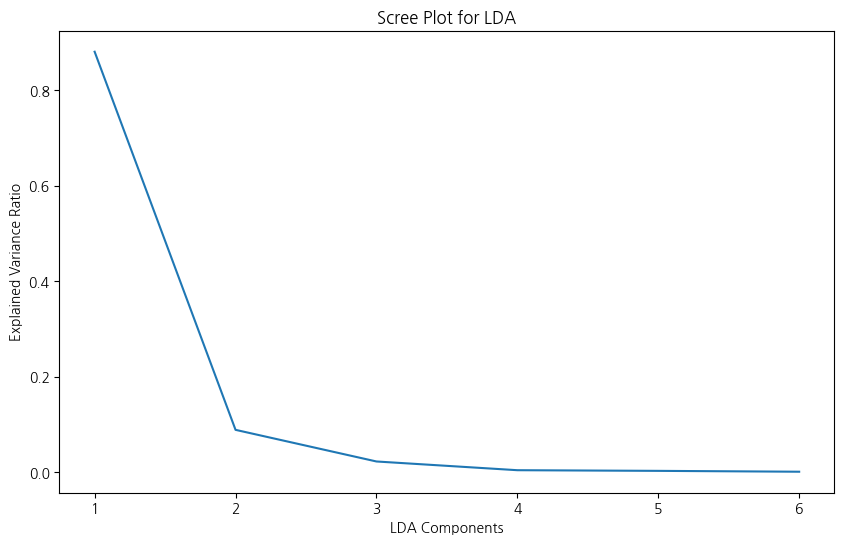

In [ ]:
# LDA 객체 생성
lda = LDA()

# LDA를 훈련 데이터에 적용
lda.fit(train_scaled, train_y_over)
lda_transformed_train = lda.transform(train_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, lda_transformed_train.shape[1] + 1), lda.explained_variance_ratio_)
plt.xlabel('LDA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for LDA')
plt.show()

In [ ]:
# LDA수는 가장 적합한 2로 설정해서 다시 적용
lda = LDA(n_components=2)

lda.fit(train_scaled, train_y_over)
lda_transformed_train = lda.transform(train_scaled)

lda_transformed_test = lda.transform(test_scaled)

In [ ]:
# LDA로 생성된 칼럼명을 작성하기 위함
lda_columns_train = [f'LDA{i+1}' for i in range(lda_transformed_train.shape[1])]
lda_columns_test = [f'LDA{i+1}' for i in range(lda_transformed_test.shape[1])]

lda_df_train = pd.DataFrame(lda_transformed_train, columns = lda_columns_train)
lda_df_test = pd.DataFrame(lda_transformed_test, columns = lda_columns_test)

In [ ]:
# NumPy 배열을 데이터프레임으로 변환
scaled_train = pd.DataFrame(train_scaled, columns=train_x_over.columns, index=train_x_over.index)
scaled_test = pd.DataFrame(test_scaled, columns=test_x.columns, index=test_x.index)

In [ ]:
lda_train_x = pd.concat([scaled_train, lda_df_train], axis=1)
lda_test_x = pd.concat([scaled_test, lda_df_test], axis=1)

### SMOTE(사용 X)

In [ ]:
# KMeansSMOTE로 데이터 수 증강(오버샘플링)

smote = KMeansSMOTE(cluster_balance_threshold=0.0045, random_state=42)
train_x_over, train_y_over = smote.fit_resample(train_x, train_y)
print('SMOTE 적용 전 값의 분포 :\n',pd.Series(train_y).value_counts())
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", train_x.shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', train_x_over.shape, train_y_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(train_y_over).value_counts())

SMOTE 적용 전 값의 분포 :
 대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64
SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (96294, 28) (96294,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (201752, 28) (201752,)
SMOTE 적용 후 값의 분포 :
 대출등급
A    28824
E    28824
C    28823
D    28823
F    28822
G    28819
B    28817
Name: count, dtype: int64


### voting (사용X)

RandomForestClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = [
    ('bag', BaggingClassifier(random_state=42, n_jobs=5)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rc', RidgeClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('lgb', LGBMClassifier(random_state=42, n_jobs=5)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(random_state=42)),
    ('rcc', RidgeClassifierCV()),
    ('rf', RandomForestClassifier(random_state=42, n_jobs=5))
]

best_model  = VotingClassifier(models, voting='hard', weights=[1,1,1,2,1,1,1,1,2], n_jobs=5)
best_model.fit(lda_train_x,train_y_over)

y_pred = best_model.predict(lda_test_x)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.028057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5418
[LightGBM] [Info] Number of data points in the train set: 201752, number of used features: 30
[LightGBM] [Info] Start training from score -1.945831
[LightGBM] [Info] Start training from score -1.946074
[LightGBM] [Info] Start training from score -1.945866
[LightGBM] [Info] Start training from score -1.945866
[LightGBM] [Info] Start training from score -1.945831
[LightGBM] [Info] Start training from score -1.945900
[LightGBM] [Info] Start training from score -1.946004


VotingClassifier(estimators=[('bag', BaggingClassifier(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('rc', RidgeClassifier(random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=F...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('lgb', LGBMClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('svc', SVC(random_state=42)),
                             ('rcc', RidgeClassifierCV()),
                             ('rf', RandomForestClassifier(random_state=42))],
                 weights=[1, 1, 1, 2, 1, 1, 1, 1, 2])

In [ ]:
# 예측
y_pred = best_model.predict(lda_test_x)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder

# # 학습 및 테스트 데이터 분할
# # X_train, X_val, y_train, y_val = train_test_split(lda_train_x, train_y_over, test_size=0.3, random_state=42)

# # le = LabelEncoder()
# # train_y_over = le.fit_transform(train_y_over)
# # y_val = le.fit_transform(y_val)

# # RandomForestClassifier 모델 생성
# # model = xgb.XGBClassifier(random_state=42)
# model = RandomForestClassifier(random_state=42)

# # 모델 학습
# # model.fit(lda_train_x, train_y_over)
# model.fit(lda_train_x, train_y_over)

# # 예측
# y_pred = model.predict(lda_test_x)

In [ ]:
# y_pred = le.inverse_transform(y_pred)
# y_val = le.inverse_transform(y_val)

In [ ]:
# # 소득 기간 둘다있을떄
# from sklearn.metrics import classification_report

# print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           A       0.96      0.98      0.97      8543
           B       0.95      0.95      0.95      8627
           C       0.95      0.95      0.95      8653
           D       0.96      0.96      0.96      8584
           E       0.98      0.97      0.98      8697
           F       0.99      0.99      0.99      8883
           G       1.00      1.00      1.00      8539

    accuracy                           0.97     60526
   macro avg       0.97      0.97      0.97     60526
weighted avg       0.97      0.97      0.97     60526



In [ ]:
feature_importance = best_model.feature_importances_
features_name = lda_train_x.columns

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.barh(features_name, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('RandomForestClassifier Feature Importance')
plt.show()

AttributeError: 'VotingClassifier' object has no attribute 'feature_importances_'

In [ ]:
feature_importance

array([0.00336641, 0.06892003, 0.00274741, 0.00316937, 0.00279072,
       0.00345164, 0.00301829, 0.00242784, 0.00310022, 0.0028982 ,
       0.00276778, 0.10490142, 0.11426602, 0.53113747, 0.003541  ,
       0.00253901, 0.13692385, 0.0032665 , 0.0047668 ], dtype=float32)

In [ ]:
# print(classification_report(y_val, y_pred))

In [ ]:
submit.loc[:,"대출등급"] = y_pred
submit

,ID,대출등급
0,TEST_00000,B
1,TEST_00001,D
2,TEST_00002,A
3,TEST_00003,C
4,TEST_00004,C
...,...,...
64192,TEST_64192,D
64193,TEST_64193,D
64194,TEST_64194,D
64195,TEST_64195,C


In [ ]:
submit.to_csv("modeling21.csv", index=False)